In [29]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cv2
import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision.transforms as transforms
from dish_autoencooder import DishAutoencoder


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH_GPU = "/home/pgliwny/computer_vision_project/data"
PATH_ADATA = "/media/pgliwny/ADATA HD330/Computer_vision_for_MAGIC/prepare_images/data"
H5_PATH = os.path.join(PATH_GPU, "webcam_images.h5")

In [3]:
event_id = 15
f = h5py.File(H5_PATH, "r")
keys = list(f["images"].keys())
img = f["images"][keys[event_id]]["image"][:]

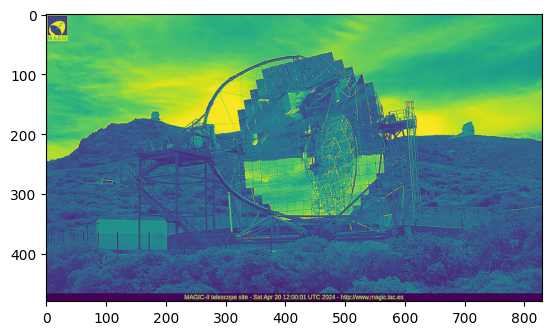

In [4]:
plt.imshow(img)

In [5]:
img.shape

(480, 830)

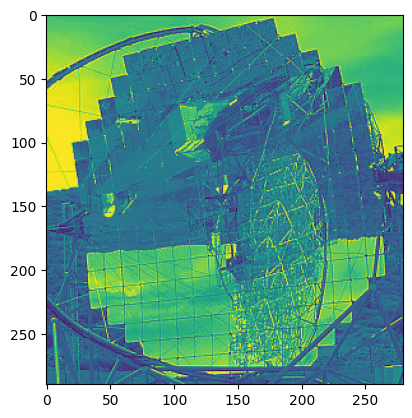

In [11]:
dish_img = img[60:350, 300:580]
plt.imshow(dish_img)

In [13]:
dish_img.shape

(290, 280)

In [17]:
class DishImageDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image

In [21]:
img_dish = np.zeros((100, 1, 290, 280))
for i, event_id in enumerate(range(100)):
    img = f["images"][keys[event_id]]["image"][:]
    new_img = img[60:350, 300:580]
    img_dish[i, :, :, :] = new_img

In [59]:
# Preprocess and normalize the images
X_tensor = torch.tensor(img_dish, dtype=torch.float32)

# Normalize to range [0, 1] and make sure the tensor is of correct shape
X_tensor = (X_tensor - X_tensor.min()) / (X_tensor.max() - X_tensor.min())  # Normalize

# Define transform for input image if needed
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Dataset and DataLoader
dataset = DishImageDataset(X_tensor, transform=transform)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define the model (DishAutoencoder) with feature_dim=64 as you provided earlier
model = DishAutoencoder(feature_dim=64)

# Loss function (Mean Squared Error Loss for reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 20
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    for images in tqdm.tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()  # Zero the gradients

        # Make sure the images tensor is of correct shape: [batch_size, channels, height, width]
        images = images.float()

        # Forward pass: Get the reconstructed image and feature vector
        reconstructed, feature_vector = model(images)

        # Compute the reconstruction loss
        loss = criterion(reconstructed, images)  # Comparing the original image with the reconstructed image

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print average loss for the epoch
    avg_loss = running_loss / len(data_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch 1/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch [1/20], Loss: 0.3005


Epoch 2/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


Epoch [2/20], Loss: 0.3016


Epoch 3/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [3/20], Loss: 0.3126


Epoch 4/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [4/20], Loss: 0.2699


Epoch 5/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [5/20], Loss: 0.2268


Epoch 6/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [6/20], Loss: 0.1910


Epoch 7/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [7/20], Loss: 0.1901


Epoch 8/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [8/20], Loss: 0.1789


Epoch 9/20: 100%|████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch [9/20], Loss: 0.1665


Epoch 10/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [10/20], Loss: 0.1579


Epoch 11/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


Epoch [11/20], Loss: 0.1495


Epoch 12/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [12/20], Loss: 0.1424


Epoch 13/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [13/20], Loss: 0.1367


Epoch 14/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.57it/s]


Epoch [14/20], Loss: 0.1328


Epoch 15/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]


Epoch [15/20], Loss: 0.1301


Epoch 16/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [16/20], Loss: 0.1284


Epoch 17/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [17/20], Loss: 0.1247


Epoch 18/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch [18/20], Loss: 0.1204


Epoch 19/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.56it/s]


Epoch [19/20], Loss: 0.1173


Epoch 20/20: 100%|███████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.58it/s]

Epoch [20/20], Loss: 0.1151


In [60]:
# Assuming the model is already trained and is in evaluation mode
model.eval()

# Initialize an empty list to store the feature vectors
features = []

# Extract features from the encoder part of the model
with torch.no_grad():
    for images in data_loader:
        _, feature_vector = model(images)
        features.append(feature_vector)

# Stack the features into a single tensor (shape: [num_samples, feature_dim])
features = torch.cat(features, dim=0)
features_np = features.numpy()  # Convert the features to a NumPy array for clustering

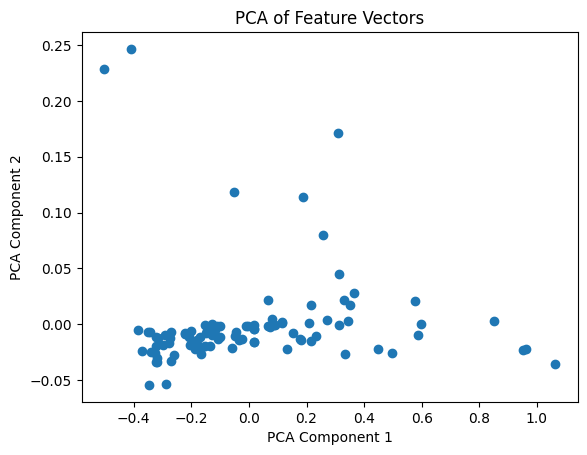

In [62]:
# Apply PCA to reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_np)

# Plot the PCA-reduced features
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title("PCA of Feature Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

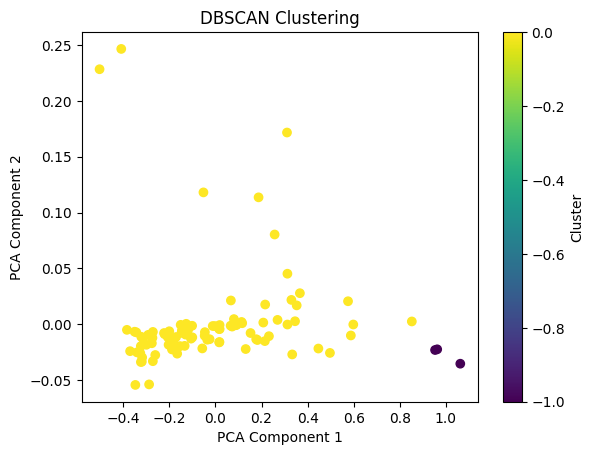

In [63]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)  # You may need to tune these parameters
labels_dbscan = dbscan.fit_predict(features_pca)

# Visualize the DBSCAN clustering results
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [70]:
np.where(features_pca[:, 1] > 0.1)

(array([ 0,  2, 13, 35, 94]),)

In [64]:
for i, label in enumerate(labels_dbscan):
    if label == -1:
        print(i)

12
21
41


In [50]:
img_dish.shape

(100, 1, 290, 280)

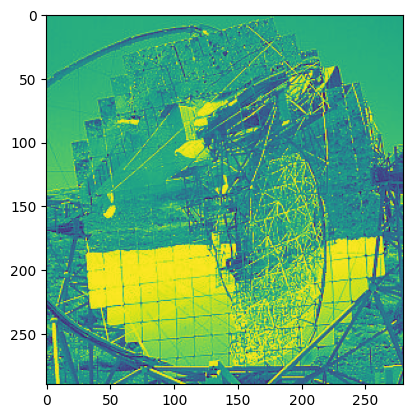

In [78]:
plt.imshow(img_dish[95, 0, :, :])